In [29]:
from tensorflow.keras.optimizers import Adam


In [30]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import UpSampling2D

In [31]:
from keras import callbacks, optimizers
from keras.models import Model, load_model, model_from_json
from keras.preprocessing import image
from keras.layers import Input, Conv2D, MaxPooling2D, Activation, BatchNormalization, Conv2DTranspose, Concatenate
 
from keras.callbacks import ModelCheckpoint
import tensorflow as tf
from keras import backend as K
 
import numpy as np
import pandas as pd
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline


In [32]:
from PIL import Image
#from keras import utils
import re
import os
from keras.models import Model, load_model
import tensorflow as tf
from keras.layers import Input
from keras.layers.core import Dropout, Lambda
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras import optimizers
from keras.layers import BatchNormalization
from tensorflow.keras.metrics import MeanIoU
import keras
# from keras.applications.resnet50 import ResNet50
# from keras import utils 
# from keras.utils import plot_model
from skimage import color
import pickle
import matplotlib.pyplot as plt
import albumentations as album

In [76]:
"""
db = dbf.Dbf("massachusetts-buildings_corrected.dbf", new = True)

"""
dim = (256,256)

x_train = []
for root, dirnames, filenames in os.walk("png/train"):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            filepath = os.path.join(root, filename)
            image = cv2.imread(filepath)
            resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
            image_resized = np.array(resized)
            x_train.append(image_resized)
    X_train = np.array(x_train)
print(X_train.shape)

y_train = []
for root, dirnames, filenames in os.walk("png/train_labels"):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            filepath = os.path.join(root, filename)
            image = cv2.imread(filepath)
            resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
            image_resized = np.array(resized)
            y_train.append(image_resized)
    Y_train = np.array(y_train)
print(Y_train.shape)    
    
x_test = []
for root, dirnames, filenames in os.walk("png/test"):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            filepath = os.path.join(root, filename)
            image = cv2.imread(filepath)
            resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
            image_resized = np.array(resized)
            x_test.append(image_resized)
    X_test = np.array(x_test)
print(X_test.shape)    
    
y_test = []
for root, dirnames, filenames in os.walk("png/test_labels"):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            filepath = os.path.join(root, filename)
            image = cv2.imread(filepath)
            resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
            image_resized = np.array(resized)
            y_test.append(image_resized)
    Y_test = np.array(y_test)
print(Y_test.shape)

x_val = []
for root, dirnames, filenames in os.walk("png/val"):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            filepath = os.path.join(root, filename)
            image = cv2.imread(filepath)
            resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
            image_resized = np.array(resized)
            x_val.append(image_resized)
    X_val = np.array(x_val)
print(X_val.shape)    
    
y_val = []
for root, dirnames, filenames in os.walk("png/val_labels"):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            filepath = os.path.join(root, filename)
            image = cv2.imread(filepath)
            resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
            image_resized = np.array(resized)
            y_val.append(image_resized)
    Y_val = np.array(y_val)
print(Y_val.shape)

(137, 256, 256, 3)
(137, 256, 256, 3)
(10, 256, 256, 3)
(10, 256, 256, 3)
(4, 256, 256, 3)
(4, 256, 256, 3)


In [36]:
def convert_to_gray(image):
    print(image.shape)
    roadlabelgray = []
    for i in range(image.shape[0]):
      roadlabelgray.append(cv2.cvtColor(image[i], cv2.COLOR_BGR2GRAY))
    roadlabelgray = np.asarray(roadlabelgray)
    #del 
    image_1 = np.expand_dims(roadlabelgray, -1)
    print(image_1.shape)
    return image_1

In [77]:
# Converting the images in grey scale
Y_train_grey=convert_to_gray(Y_train)
Y_test_grey=convert_to_gray(Y_test)
X_test_grey=convert_to_gray(X_test)

(137, 256, 256, 3)
(137, 256, 256, 1)
(10, 256, 256, 3)
(10, 256, 256, 1)
(10, 256, 256, 3)
(10, 256, 256, 1)


In [81]:
X_test_grey=convert_to_gray(X_train)

(137, 256, 256, 3)
(137, 256, 256, 1)


In [79]:
image_shape = (256,256)

In [ ]:
from tensorflow.keras import backend as K
def dice_coef1(y_true, y_pred):
  y_true_f = K.flatten(y_true)
  y_pred_f = K.flatten(y_pred)
  intersection = K.sum(y_true_f * y_pred_f)
  return (2. * intersection + 0.0001) / (K.sum(y_true_f) + K.sum(y_pred_f) + 0.0001)

def dice_coef_loss1(y_true, y_pred):
  return 1 - dice_coef(y_true, y_pred)

In [50]:
def Unet(num_classes = 1, input_shape= (image_shape[0],image_shape[1], 3)):
    inp = Input(input_shape)
    block_conv = Conv2D(64,(3,3),padding = 'same')(inp)
    block_conv = BatchNormalization()(block_conv)
    block_conv = Activation('relu')(block_conv)
    
    block_conv = Conv2D(64,(3,3), padding = 'same')(block_conv)
    block_conv = BatchNormalization()(block_conv)
    output_block_one = Activation('relu')(block_conv)
    block_conv = MaxPooling2D()(output_block_one)
    
    
    block_conv = Conv2D(128,(3,3), padding = 'same')(block_conv)
    block_conv = BatchNormalization()(block_conv)
    block_conv = Activation('relu')(block_conv)
    
    block_conv = Conv2D(128,(3,3), padding = 'same')(block_conv)
    block_conv = BatchNormalization()(block_conv)
    output_block_two = Activation('relu')(block_conv)
    block_conv = MaxPooling2D()(output_block_two)
    
   
    block_conv = Conv2D(256,(3,3), padding = 'same')(block_conv)
    block_conv = BatchNormalization()(block_conv)
    block_conv = Activation('relu')(block_conv)
    
    block_conv = Conv2D(256,(3,3), padding = 'same')(block_conv)
    block_conv = BatchNormalization()(block_conv)
    block_conv = Activation('relu')(block_conv)
    
    block_conv = Conv2D(256,(3,3), padding = 'same')(block_conv)
    block_conv = BatchNormalization()(block_conv)
    output_block_three = Activation('relu')(block_conv)
    block_conv = MaxPooling2D()(output_block_three)
    
 
    block_conv = Conv2D(512,(3,3), padding = 'same')(block_conv)
    block_conv = BatchNormalization()(block_conv)
    block_conv = Activation('relu')(block_conv)
    
    block_conv = Conv2D(512,(3,3), padding = 'same')(block_conv)
    block_conv = BatchNormalization()(block_conv)
    block_conv = Activation('relu')(block_conv)
    
    block_conv = Conv2D(512,(3,3), padding = 'same')(block_conv)
    block_conv = BatchNormalization()(block_conv)
    output_block_four = Activation('relu')(block_conv)
    
    block_conv = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(output_block_four)
    block_conv = BatchNormalization()(block_conv)
    output_block_four = Activation('relu')(block_conv)
    
    block_conv = Concatenate()([block_conv, output_block_three])    
    block_conv = Conv2D(256, (3,3), padding = 'same')(block_conv)
    block_conv = BatchNormalization()(block_conv)
    block_conv = Activation('relu')(block_conv)
    
    block_conv = Conv2D(256, (3,3), padding = 'same')(block_conv)
    block_conv = BatchNormalization()(block_conv)
    output_block_four = Activation('relu')(block_conv)
    

    block_conv = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(block_conv)
    block_conv = BatchNormalization()(block_conv)
    block_conv = Activation('relu')(block_conv)    
    block_conv = Concatenate()([block_conv, output_block_two])
    
    block_conv = Conv2D(128, (3,3), padding = 'same')(block_conv)
    block_conv = BatchNormalization()(block_conv)
    block_conv = Activation('relu')(block_conv)
    
    block_conv = Conv2D(128, (3,3), padding = 'same')(block_conv)
    block_conv = BatchNormalization()(block_conv)
    block_conv = Activation('relu')(block_conv)
    
    
    block_conv = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(block_conv)
    block_conv = BatchNormalization()(block_conv)
    output_block_four = Activation('relu')(block_conv)
    
    block_conv = Concatenate()([block_conv, output_block_one])    
    block_conv = Conv2D(64, (3,3), padding = 'same')(block_conv)
    block_conv = BatchNormalization()(block_conv)
    block_conv = Activation('relu')(block_conv)
    
    block_conv = Conv2D(64, (3,3), padding = 'same')(block_conv)
    block_conv = BatchNormalization()(block_conv)
    block_conv = Activation('relu')(block_conv)
    block_conv = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(block_conv)
    model = Model(inputs=inp, outputs=block_conv)
    opt = tf.keras.optimizers.SGD(learning_rate=0.1)
    adam = tf.keras.optimizers.Adam(lr=0.0001)
    
    model.compile(optimizer = adam, loss=dice_coef_loss1,metrics=[dice_coef1])
   
    return model


In [51]:
model = Unet()
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_131 (Conv2D)            (None, 256, 256, 64  1792        ['input_13[0][0]']               
                                )                                                                 
                                                                                                  
 batch_normalization_193 (Batch  (None, 256, 256, 64  256        ['conv2d_131[0][0]']             
 Normalization)                 )                                                           

C:\Users\smith\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [52]:
batch_size = 2
history = model.fit(X_train, Y_train_grey.astype(np.float16)/255, epochs=50, verbose=1, workers=1, batch_size=4)


Epoch 1/50
35/35 [==============================] - 162s 5s/step - loss: 0.6997 - dice_coef1: 0.2983
Epoch 2/50
35/35 [==============================] - 157s 4s/step - loss: 0.6223 - dice_coef1: 0.3786
Epoch 3/50
35/35 [==============================] - 157s 4s/step - loss: 0.5662 - dice_coef1: 0.4334
Epoch 4/50
35/35 [==============================] - 156s 4s/step - loss: 0.5308 - dice_coef1: 0.4700
Epoch 5/50
35/35 [==============================] - 156s 4s/step - loss: 0.5057 - dice_coef1: 0.4881
Epoch 6/50
35/35 [==============================] - 157s 4s/step - loss: 0.4833 - dice_coef1: 0.5166
Epoch 7/50
35/35 [==============================] - 156s 4s/step - loss: 0.4663 - dice_coef1: 0.5336
Epoch 8/50
35/35 [==============================] - 156s 4s/step - loss: 0.4512 - dice_coef1: 0.5443
Epoch 9/50
35/35 [==============================] - 157s 4s/step - loss: 0.4416 - dice_coef1: 0.5587
Epoch 10/50
35/35 [==============================] - 156s 4s/step - loss: 0.4262 - dice_coe

In [53]:
predict = model.predict(X_test, batch_size = 5)


In [40]:
def displayimages(**images):

    n_images = len(images)
    plt.figure(figsize=(16,8))
    for idx,(name,image) in enumerate(images.items()):
        plt.subplot(1, n_images, idx + 1)
        plt.xticks([]); 
        plt.yticks([])
        plt.title(name.replace('_',' ').title(), fontsize=20)
        plt.imshow(image)

    plt.show()

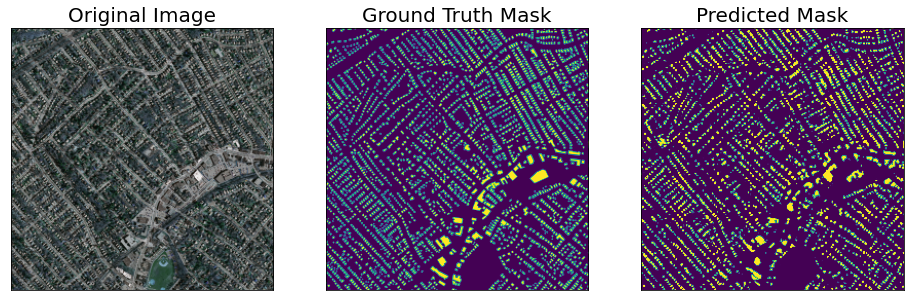

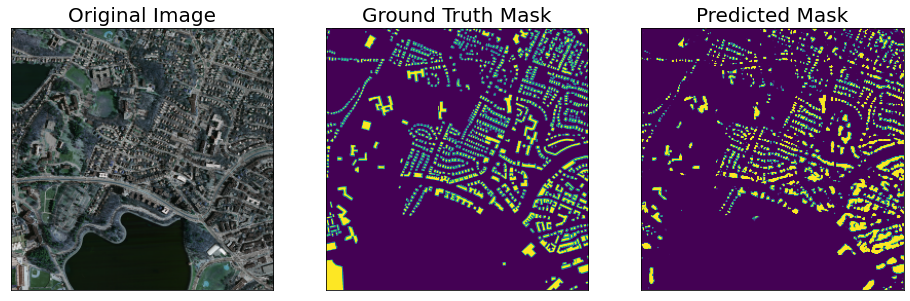

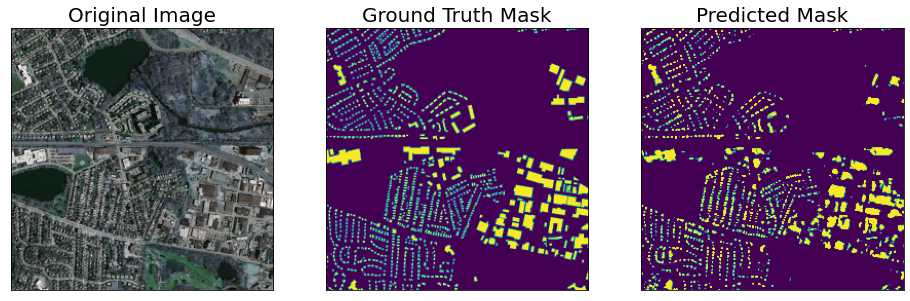

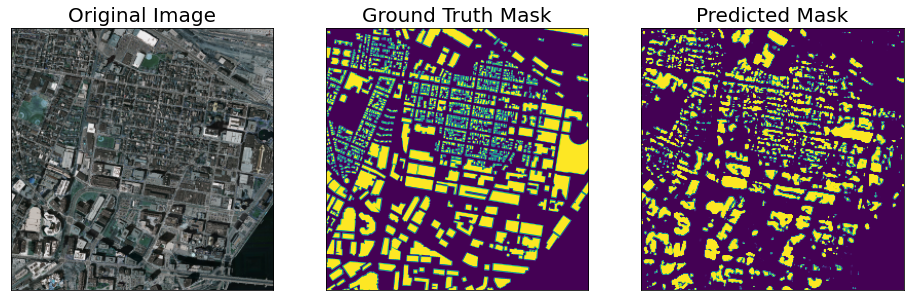

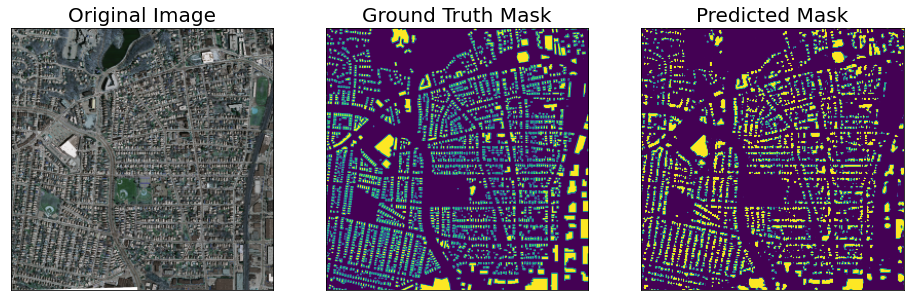

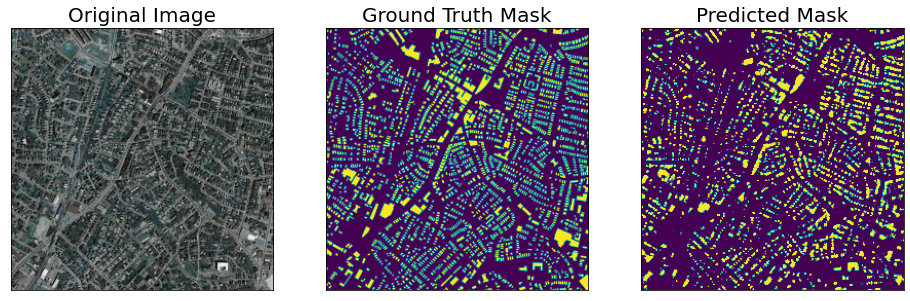

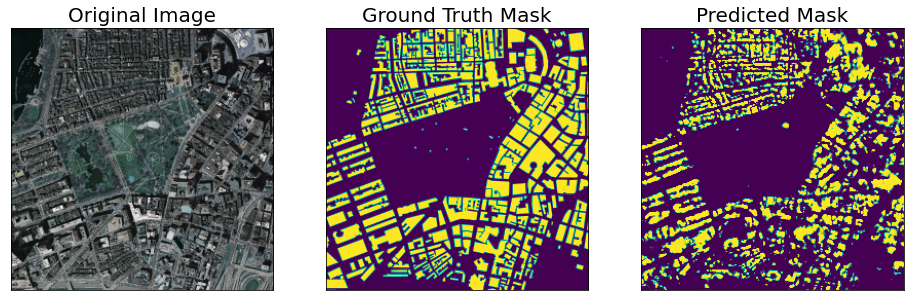

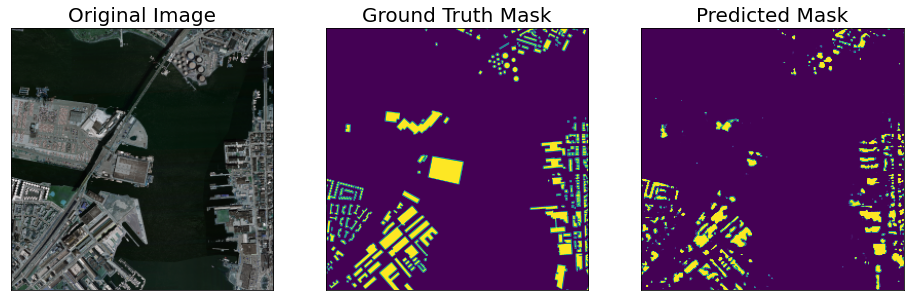

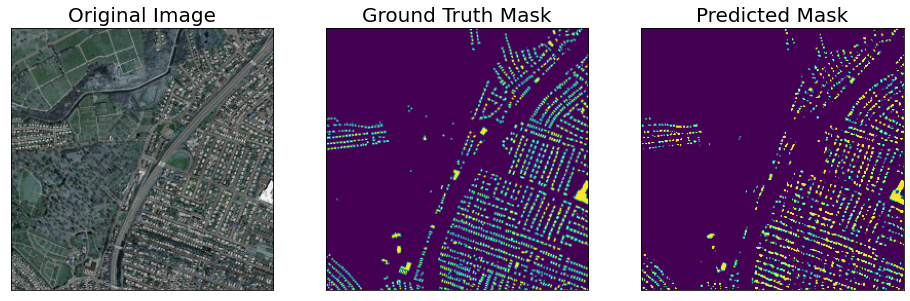

In [93]:
for i in range(9): # test results with 50 Epochs
    
    displayimages(
            original_image = X_test[i],
            ground_truth_mask = Y_test_grey[i],
            predicted_mask = predict[i])